# Back Propagation

Implement the custome backpropagation for the given graph and update the weights with vanill update(simple update),Momentum update and Adam update and compare the results.

In [1]:
import pickle
with open('data.pkl', 'rb') as f:
    data = pickle.load(f)
print(data.shape)
X = data[:, :5]
y = data[:, -1]
print(X.shape, y.shape)

(506, 6)
(506, 5) (506,)


# Computational graph

<img src='https://i.imgur.com/seSGbNS.png'>

<pre>
1. if you observe the graph, we are having input features [f1, f2, f3, f4, f5] and 9 weights [w1, w2, w3, w4, w5, w6,    w7, w8, w9]
2. the final output of this graph is a value L which is computed as (Y-Y')^2
</pre>

###    Implementing backpropagation and Gradient checking


 
 
<pre>we know that the derivative of any function is </pre>$$\lim_{\epsilon\to0}\frac{f(x+\epsilon)-f(x-\epsilon)}{2\epsilon}$$
<pre>
The definition above can be used as a numerical approximation of the derivative. Taking an epsilon small enough, the calculated approximation will have an error in the range of epsilon squared. 

In other words, if epsilon is 0.001, the approximation will be off by 0.00001.

Therefore, we can use this to approximate the gradient, and in turn make sure that backpropagation is implemented properly. This forms the basis of gradient checking!

</pre>

<font >
lets understand the concept with a simple example:
$f(w1,w2,x1,x2)=w_{1}^{2} . x_{1} + w_{2} . x_{2}$ 

from the above function lets assume $w_{1}=1$, $w_{2}=2$, $x_{1}=3$, $x_{2}=4$ the gradient of $f$ w.r.t $w_{1}$ is

\begin{array} {lcl}
\frac{df}{dw_{1}} = dw_{1} &=&2.w_{1}.x_{1} \\& = &2.1.3\\& = &6
\end{array}


let calculate the aproximate gradient of $w_{1}$ as mentinoned in the above formula and considering $\epsilon=0.0001$

\begin{array} {lcl}
dw_1^{approx} & = & \frac{f(w1+\epsilon,w2,x1,x2)-f(w1-\epsilon,w2,x1,x2)}{2\epsilon} \\ & = & \frac{((1+0.0001)^{2} . 3 + 2 . 4) - ((1-0.0001)^{2} . 3 + 2 . 4)}{2\epsilon} \\ & = & \frac{(1.00020001 . 3 + 2 . 4) - (0.99980001. 3 + 2 . 4)}{2*0.0001} \\ & = & \frac{(11.00060003) - (10.99940003)}{0.0002}\\ & = & 5.99999999999
\end{array}

Then, we apply the following formula for gradient check: <i>gradient_check</i> = 
$\frac{\left\Vert\left (dW-dW^{approx}\rm\right) \right\Vert_2}{\left\Vert\left (dW\rm\right) \right\Vert_2+\left\Vert\left (dW^{approx}\rm\right) \right\Vert_2}$

The equation above is basically the Euclidean distance normalized by the sum of the norm of the vectors. We use normalization in case that one of the vectors is very small.
As a value for epsilon, we usually opt for 1e-7. Therefore, if gradient check return a value less than 1e-7, then it means that backpropagation was implemented correctly. Otherwise, there is potentially a mistake in your implementation. If the value exceeds 1e-3, then you are sure that the code is not correct.

in our example: <i>gradient_check</i> $ = \frac{(6 - 5.999999999994898)}{(6 + 5.999999999994898)} = 4.2514140356330737e^{-13}$

you can mathamatically derive the same thing like this

\begin{array} {lcl}
dw_1^{approx} & = & \frac{f(w1+\epsilon,w2,x1,x2)-f(w1-\epsilon,w2,x1,x2)}{2\epsilon} \\ & = & \frac{((w_{1}+\epsilon)^{2} . x_{1} + w_{2} . x_{2}) - ((w_{1}-\epsilon)^{2} . x_{1} + w_{2} . x_{2})}{2\epsilon} \\ & = & \frac{4. \epsilon.w_{1}. x_{1}}{2\epsilon} \\ & = &  2.w_{1}.x_{1}
\end{array}

 

### Computation graph with each output from different functions 

<img src='https://i.imgur.com/I7C1U4d.jpg'>

### Differentiation of each output with corresponding input

<img src='https://i.imgur.com/4YiRSdo.jpg'>

In [2]:
import numpy as np
w= np.random.normal(0,0.01,9) #randomly initialize weights
def forward_propagation(X, y,w,i):#looking at the graph write corresponding eequations and derivatives 
    q1=w[0]*X[i][0]
    q2=w[1]*X[i][1]  #all the upper connections are represented as q
    q3=q1+q2
    q4=q2+q1
    q5=q3*q4
    q6=q5+w[5]
    q7=np.exp(q6)
    q8=q7+w[6]
    q9=np.tanh(q8)
    #----------------------------
    k1=w[2]*X[i][2]
    k2=np.sin(k1)      #all the upper connections are represented as k
    k3=w[3]*X[i][3]
    k4=w[4]*X[i][4]
    k5=k3+k4
    k6=k2*k5
    k7=k6+w[7]
    k8=1/(1+np.exp(-(k7)))
    k9=k8*w[8]
    #-----------------------------
    y_=q9+k9 #final predicted y value
    L=(y[i]-y_)*(y[i]-y_) #Loss function
    #-----------------------------
    dL=1
    dy_=-2*(y[i]-y_)
    #-----------------------------
    #derivatives of the first layer
    d1={'dq9':1,'dq8':(1-(q9*q9)),'dq7':1,'dw6':1,'dq6':q7,'dq5':1,'dw5':1,'dq4':q3,'dq3':q4,'dq2':1,'dq1':1,'dw1':X[i][1],'dw0':X[i][0]}     
    #------------------------------
    #derivatives of the second layer
    d2={'dk9':1,'dk8':w[8],'dw8':k8,'dk7':k8*(1-k8),'dk6':1,'dw7':1,'dk5':k2,'dk4':1,'dk3':1,'dw4':X[i][4],'dw3':X[i][3],'dk2':k5,'dk1':np.cos(k1),'dw2':X[i][2]}
    
    return y_,L,dL,dy_,d1,d2,w

In [3]:
n=1 #row indecies
y_,L,dL,dy_,d1,d2,w=forward_propagation(X,y,w,n)
def backward_propagation(dL,dy_,d1,d2):
    #apply chain rule to calculate derivatives
    dw6=dL*dy_*d1['dq9']*d1['dq8']*d1['dw6']#multiply each intermediate derivaties to reach the derivatie with loss function 
    dw5=dL*dy_*d1['dq9']*d1['dq8']*d1['dq7']*d1['dq6']*d1['dw5']
    
    a1=dL*dy_*d1['dq9']*d1['dq8']*d1['dq7']*d1['dq6']*d1['dq5'] 
    dw0=(d1['dq3']+d1['dq4'])*a1*d1['dw0']*d1['dq1']
    dw1=(d1['dq3']+d1['dq4'])*a1*d1['dw1']*d1['dq2']
    
    dw8=dL*dy_*d2['dk9']*d2['dw8']
    dw7=dL*dy_*d2['dk9']*d2['dk8']*d2['dk7']*d2['dw7']
    dw4=dw7*d2['dk6']*d2['dk5']*d2['dk4']*d2['dw4']
    dw3=dw7*d2['dk6']*d2['dk5']*d2['dk3']*d2['dw3']
    dw2=dw7*d2['dk6']*d2['dk2']*d2['dk1']*d2['dw2']
    
    return dw0,dw1,dw2,dw3,dw4,dw5,dw6,dw7,dw8  
a=list(backward_propagation(dL,dy_,d1,d2))  #list of all weights found with back propogation

In [4]:
from prettytable import PrettyTable
#list of all the approximate gradients ,gradients and gradient checking with one iteration    
x = PrettyTable()
x.field_names = ["Weights", "Approximate Gradients", "Back propogation", "Gradient Checking"]

p=w.copy()
e=0.0001
for i in range(len(w)):#iterate through each weight to find approximate gradients
    w=p
    k=w.copy()
    m=w.copy()
    k[i]=k[i]+e #weight + small value
    m[i]=m[i]-e #weight - small value
    y_,L1,dL,dy_,d1,d2,w=forward_propagation(X,y,k,n) #find Loss function with corresponding weight
    y_,L2,dL,dy_,d1,d2,w=forward_propagation(X,y,m,n)
    Ag=(L1-L2)/(2*e) #approximate gradient
    
    D=np.sqrt((Ag-a[i])*(Ag-a[i]))/((np.sqrt(Ag*Ag))+np.sqrt(a[i]*a[i])) #as per the above function
    x.add_row(["W"+str(i), Ag, a[i],D])
    
print(x)

+---------+-------------------------+-------------------------+------------------------+
| Weights |  Approximate Gradients  |     Back propogation    |   Gradient Checking    |
+---------+-------------------------+-------------------------+------------------------+
|    W0   |  0.0023751938504901204  |   0.002375193855812572  | 1.120424691592324e-09  |
|    W1   |  -0.001469698895917304  |  -0.0014696988985221458 | 8.861820929770709e-10  |
|    W2   |  2.3739565868652335e-07 |  2.3739509063287615e-07 | 1.1964294755370769e-06 |
|    W3   | -1.1073253425308849e-07 | -1.1073103325463195e-07 | 6.777631523916089e-06  |
|    W4   |  -8.302469822751846e-08 |  -8.302192965757275e-08 | 1.6673448783420905e-05 |
|    W5   |   -0.8810131434033863   |   -0.8810131455691624   | 1.2291395012430233e-09 |
|    W6   |   -0.8898287590930476   |    -0.889828754209707   | 2.743977750922543e-09  |
|    W7   |  4.507762163541429e-05  |  4.5077620649579116e-05 | 1.0934862437961367e-08 |
|    W8   |   -1.0683

# Observation

Approximate gradients and Back propagation are similar as the Values in Gradient Checking column are in order of 10 power minus 9

#   Optimizers

### 1:  Vanilla updation of weights

In [5]:
print('Weights before Vanilla update')
w= np.random.normal(0,0.01,9) #Randomly initialize initial weights
print(w)
print('='*30)

loss1=[]
for k in range(100): #100 epochs
    for i in range(len(X)):#iterate through all input values to get optimum w   #
        y_,L,dL,dy_,d1,d2,w=forward_propagation(X,y,w,i)                        #  one epoch
        a=backward_propagation(dL,dy_,d1,d2)                                    #  with one 
        w=w-(0.001*np.array(a))  #w-(learning rate*derivation of w)             #  for loop
                                 #all the eight weights are changed at once
    l=[]
    for i in range(len(X)):
        y_,L,dL,dy_,d1,d2,w=forward_propagation(X,y,w,i) #returns the loss for each input with new weights
        l.append(L)  #append loss for each input
    loss1.append(np.mean(l))  #find average loss 
print('Weights after Vanilla update')
print(w)

Weights before Vanilla update
[-7.70542319e-03  6.09847825e-03  8.61042220e-03  7.46868837e-03
  5.45609257e-05  7.24765717e-03  2.18462012e-03 -5.21608504e-03
 -7.06543852e-03]
Weights after Vanilla update
[-0.01579649  0.00360151  0.66976599  0.37458278  0.60255825  0.4831652
  0.37819386  0.271069    1.35342488]


### 2:  Momentum updation of weights

In [6]:
print('Weights before Momentum update')
w= np.random.normal(0,0.01,9)   #Randomly initialize initial weights
print(w)
print('='*30)
 
loss2=[]
vt=0
b=0.9
for k in range(100):
    for i in range(len(X)):
        y_,L,dL,dy_,d1,d2,w=forward_propagation(X,y,w,i)
        a=np.array(backward_propagation(dL,dy_,d1,d2))
        vt=b*vt+((1-b)*a)
        w=w-(0.001*vt)
    l=[]
    for i in range(len(X)):
        y_,L,dL,dy_,d1,d2,w=forward_propagation(X,y,w,i)
        l.append(L)
    loss2.append(np.mean(l))
    
print('Weights after Momentum update')
print(w)

Weights before Momentum update
[ 0.02102926  0.01160344  0.02405904  0.0031224  -0.00198604  0.01328501
  0.00623199  0.02417123  0.00563621]
Weights after Momentum update
[0.10685619 0.07032654 0.70389333 0.40398512 0.62617726 0.46757741
 0.36536582 0.27340807 1.33972129]


###  3:  Adam updation of weights

In [7]:
print('Weights before Adam update')
w= np.random.normal(0,0.01,9)    #Randomly initialize initial weights
print(w)
print('='*30)

loss3=[]
vt=0
mt=0
b1=0.9
b2=0.99
eps=0.0000001
for k in range(100):
    for i in range(len(X)):
        y_,L,dL,dy_,d1,d2,w=forward_propagation(X,y,w,i)
        a=np.array(backward_propagation(dL,dy_,d1,d2))
        mt=b1*mt+((1-b1)*a)
        vt=b2*vt+((1-b2)*(a*a))
        w=w-(0.001*(mt/(np.sqrt(vt)+eps)))
    l=[]
    for i in range(len(X)):
        y_,L,dL,dy_,d1,d2,w=forward_propagation(X,y,w,i)
        l.append(L)
    loss3.append(np.mean(l))
print('Weights after Adam update')
print(w)

Weights before Adam update
[-0.00199707 -0.00489994  0.00086265  0.0095772   0.01063969  0.00454622
  0.01003425  0.00883711 -0.01274612]
Weights after Adam update
[-0.92816456 -0.94988814  1.00577596  1.00216289  1.00947266  1.03999059
  0.90192179  0.99671677  1.00201591]


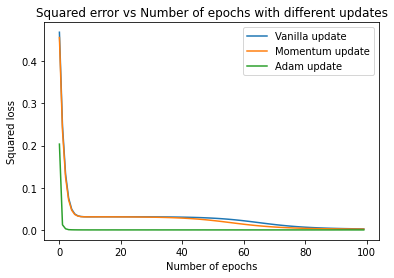

In [8]:
import matplotlib.pyplot as plt
 
x=[i for i in range(len(loss1))]
plt.plot(x,loss1,label='Vanilla update')
plt.plot(x,loss2,label='Momentum update')
plt.plot(x,loss3,label='Adam update')

plt.xlabel("Number of epochs")
plt.ylabel('Squared loss')
plt.title("Squared error vs Number of epochs with different updates")
plt.legend()

# Observations

1)Using Adam update it is possible to get optimal weights with fewer epochs(it converges much much faster than other two updates).<br />
2)Momentum  update is slightly better than Vanilla update